<a href="https://www.kaggle.com/code/dhanyathas/lead-conversion-analysis?scriptVersionId=273499999" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/website-leads-conversion-behavior-dataset/leads_behavior_data.csv


## Business Perspective

### This project is a lead conversion analysis using K-means clustering.
The goal is:

> To find what kind of visitors (leads) are likely to convert (buy or sign up) and what kind of leads are getting lost — and why.

### This helps the business:

- Identify bottlenecks in the sales funnel (like delayed follow-ups).

- Focus on high-potential leads.

- Improve conversion rates by acting faster or targeting better.

### Machine Learning Perspective

> You are performing Unsupervised Learning → Clustering (K-means).

#### Why?
- Because you don’t have labels like “high quality lead” or “low quality lead.”
- You only know behavioral features like:

visit_duration
pages_viewed
time_to_contact
interaction_score
lead_source

So, K-means groups your leads based on similar behavior patterns.

Then, after forming clusters, you compare them with the converted column (which you do know) to interpret what kind of behavior leads to conversions.

In [2]:
df = pd.read_csv("/kaggle/input/website-leads-conversion-behavior-dataset/leads_behavior_data.csv")

In [3]:
df.head()

,visit_duration,pages_viewed,time_to_contact,interaction_score,lead_source,converted,lead_id
0,14.072363,10.947666,0.646165,77.113414,Referral,1,58
1,10.609455,10.770635,0.653545,75.308243,Referral,1,96
2,6.784206,4.677701,20.319584,17.513089,Ads,0,233
3,11.337469,13.099869,1.316960,78.529426,Referral,0,36
4,7.454553,4.548512,13.477354,23.948729,Direct,0,192


In [4]:
df.shape

(300, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visit_duration     300 non-null    float64
 1   pages_viewed       300 non-null    float64
 2   time_to_contact    300 non-null    float64
 3   interaction_score  300 non-null    float64
 4   lead_source        300 non-null    object 
 5   converted          300 non-null    int64  
 6   lead_id            300 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 16.5+ KB


In [6]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df['lead_source'].unique()

array(['Referral', 'Ads', 'Direct', 'Social'], dtype=object)

In [8]:
df['lead_source'].value_counts()

lead_source
Ads         122
Direct       69
Referral     68
Social       41
Name: count, dtype: int64

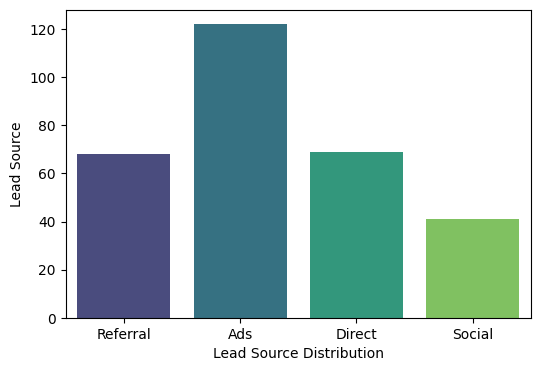

In [9]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='lead_source', data=df, palette='viridis')
plt.xlabel("Lead Source Distribution")
plt.ylabel("Lead Source")
plt.show()

In [10]:
df_encoded = pd.get_dummies(df, columns=['lead_source'], drop_first=True)


In [11]:
features = df_encoded[['visit_duration', 'pages_viewed', 'time_to_contact', 'interaction_score',
                       'lead_source_Referral', 'lead_source_Social', 'lead_source_Direct']]


time_to_contact” might be in hours (0–24), while “pages_viewed” might be 1–10.
This imbalance affects cluster formation.
so need to standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler

sclar = StandardScaler()
sclared_features = sclar.fit_transform(features)

Elbow Method to find the optimal number of clusters

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

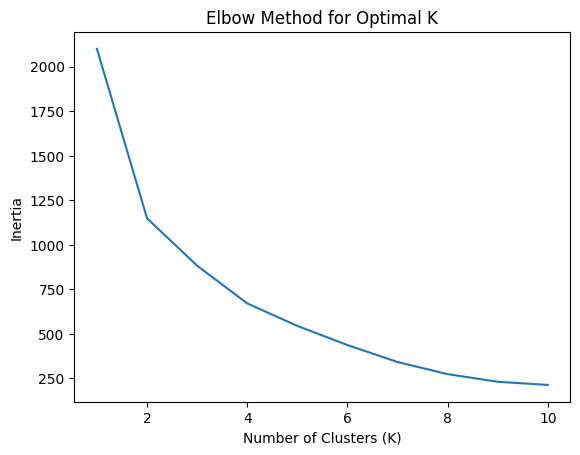

In [13]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(sclared_features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(sclared_features)
df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,visit_duration,pages_viewed,time_to_contact,interaction_score,lead_source,converted,lead_id,cluster
0,14.072363,10.947666,0.646165,77.113414,Referral,1,58,0
1,10.609455,10.770635,0.653545,75.308243,Referral,1,96,0
2,6.784206,4.677701,20.319584,17.513089,Ads,0,233,1
3,11.337469,13.099869,1.316960,78.529426,Referral,0,36,0
4,7.454553,4.548512,13.477354,23.948729,Direct,0,192,2


In [15]:
df['cluster'].unique()

array([0, 1, 2, 3], dtype=int32)

| Value | Meaning           | Real-world interpretation                                                                                                                            |
| :---: | :---------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1** | ✅ *Converted*     | The lead **took the desired action** — e.g., filled the form, signed up, booked a service, or purchased something.                                   |
| **0** | ❌ *Not converted* | The lead **did not complete the desired action** — they visited the website, maybe explored it, but **never followed through** to become a customer. |


In [16]:
df['converted'].unique()

array([1, 0])

In [17]:
df.groupby('cluster')['converted'].mean()

cluster
0    0.827160
1    0.208000
2    0.173913
3    0.840000
Name: converted, dtype: float64

Check how the delay in contacting affects the conversion rate.

In [18]:
df.groupby('cluster')['time_to_contact'].mean()


cluster
0     1.626578
1    19.110269
2    17.252968
3     1.102563
Name: time_to_contact, dtype: float64

| Cluster | Avg. Time to Contact (hours or days, depending on your data) | Interpretation                                              |
| ------- | ------------------------------------------------------------ | ----------------------------------------------------------- |
| **0**   | **1.63**                                                     | Contacted **very quickly** — probably engaged leads.        |
| **1**   | **19.11**                                                    | Contacted **quite late** — high delay in follow-up.         |
| **2**   | **17.25**                                                    | Also contacted **late**, but maybe not as bad as cluster 1. |
| **3**   | **1.10**                                                     | Contacted **immediately** — almost instant response.        |


| Cluster | Avg. Time to Contact | Avg. Conversion Rate | Interpretation                                                 |
| ------- | -------------------- | -------------------- | -------------------------------------------------------------- |
| **0**   | **1.63**             | **0.83 (83%)**       | Leads contacted **very quickly** → **most likely to convert**. |
| **1**   | **19.11**            | **0.21 (21%)**       | Contacted **very late** → **low conversion**.                  |
| **2**   | **17.25**            | **0.17 (17%)**       | Contacted **late again** → **very low conversion**.            |
| **3**   | **1.10**             | **0.84 (84%)**       | Contacted **almost instantly** → **highest conversion**.       |


“There is a negative correlation between time_to_contact and converted”

we mean:

When time_to_contact increases,
the chance of conversion (converted = 1) decreases.

So, in simple words:

The longer you take to contact a lead, the less likely they are to convert.

That’s why the company introduced automation — to reduce the time delay.

In [19]:
df.groupby('cluster')['interaction_score'].mean()

cluster
0    78.634433
1    30.142790
2    35.458001
3    82.848469
Name: interaction_score, dtype: float64

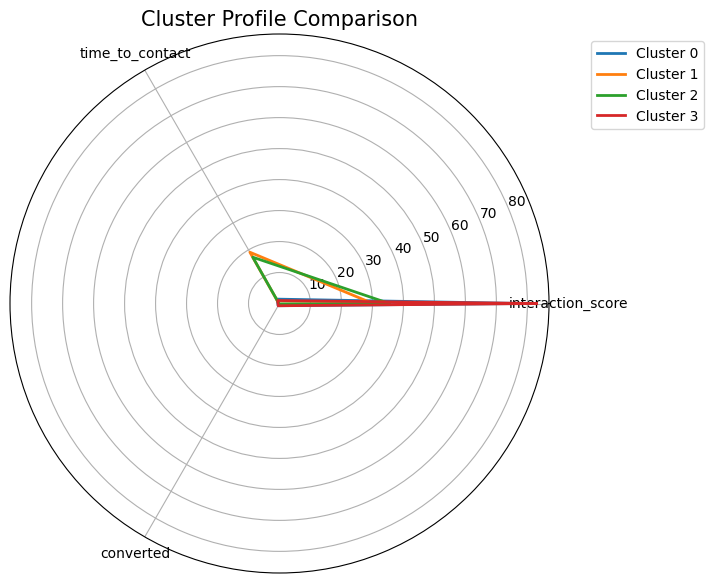

In [20]:
from math import pi

# prepare data
categories = ['interaction_score', 'time_to_contact', 'converted']
N = len(categories)

values = df.groupby('cluster')[categories].mean().values

# radar plot
plt.figure(figsize=(7,7))
for i, cluster_vals in enumerate(values):
    vals = list(cluster_vals) + [cluster_vals[0]]
    angles = [n / float(N) * 2 * pi for n in range(N)] + [0]
    plt.polar(angles, vals, label=f'Cluster {i}', linewidth=2)
    
plt.xticks(angles[:-1], categories)
plt.title('Cluster Profile Comparison', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


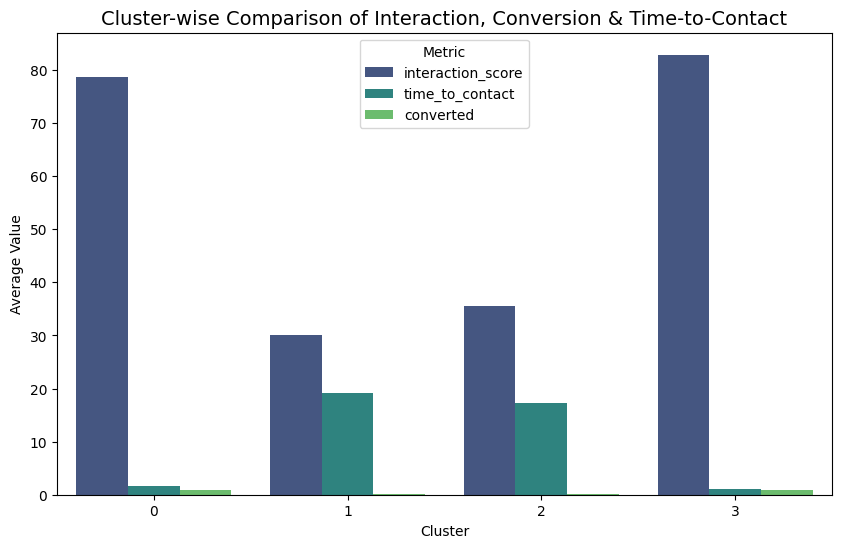

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: compute averages per cluster
cluster_summary = df.groupby('cluster')[['interaction_score', 'time_to_contact', 'converted']].mean().reset_index()

# Step 2: melt to long format for seaborn
cluster_melted = cluster_summary.melt(id_vars='cluster', var_name='Metric', value_name='Value')

# Step 3: plot
plt.figure(figsize=(10,6))
sns.barplot(data=cluster_melted, x='cluster', y='Value', hue='Metric', palette='viridis')

plt.title('Cluster-wise Comparison of Interaction, Conversion & Time-to-Contact', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.show()


In [22]:
# Train and Save Your Model

# After you finish clustering (with K-Means), save the trained model and scaler.
# import joblib

# # save the fitted kmeans model and scaler
# joblib.dump(kmeans, 'kmeans_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')


In [23]:
cluster_summary = df.groupby('cluster')[['interaction_score', 'time_to_contact', 'converted']].mean().reset_index()
cluster_summary

,cluster,interaction_score,time_to_contact,converted
0,0,78.634433,1.626578,0.827160
1,1,30.142790,19.110269,0.208000
2,2,35.458001,17.252968,0.173913
3,3,82.848469,1.102563,0.840000


Here’s what you effectively did in each step:

1. interaction_score → Engagement analysis

You measured how actively each group of leads interacted with your site.
✅ High value → more engaged users (likely to convert).  
✅ Low value → passive visitors (need attention).  

2. time_to_contact → Responsiveness analysis

You found how quickly the company contacted the leads in each cluster.
✅ Lower value → contacted faster → higher chance of conversion.  
✅ Higher value → contacted late → lower conversion probability.  

3. converted → Conversion performance

You measured the success rate (percentage of leads that actually converted) in each cluster.
✅ This directly tells you which clusters bring business value
and which need automation or workflow improvement.  

📊 What This All Means Together

You now have 4 clusters (0–3) that can be interpreted like this:

| Cluster | Time_to_contact | Interaction_score | Conversion_rate | Meaning                                   |
| ------- | --------------- | ----------------- | --------------- | ----------------------------------------- |
| 0       | Low             | High              | High            | Fast response + engaged → converts well ✅ |
| 1       | High            | Low               | Low             | Slow response + unengaged → poor leads ❌  |
| 2       | High            | Medium            | Low             | Still slow response → low conversions ❌   |
| 3       | Low             | Very High         | High            | Best-performing leads ⭐                   |


This is exactly what a lead segmentation analysis looks like in a real company:

You’ve found patterns.

You’ve discovered which types of users convert best.

You’ve found which ones need faster follow-up (automation opportunity).